In [1]:
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 38.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter const

In [2]:
!pip install super-gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.5 MB/s eta 0:00:00
  Using cached boto3-1.35.84-py3-none-any.whl.metadata (6.7 kB)
  Using cached coverage-5.3.1-cp310-cp310-linux_x86_64.whl
  Using cached Sphinx-4.0.3-py3-none-any.whl.metadata (8.0 kB)
  Using cached sphinx_rtd_theme-3.0.2-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached torchmetrics-0.8.0-py3-none-any.whl.metadata (20 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl.metadata (5.5 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached pip_tools-7.4.1-py3-none-any.whl.metadata (26 kB)
  Using cached einops-0.3.2-py3-none-any.whl.metadata (10 kB)
  Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (679 bytes)
  Using cached treelib-1.6.1-py3-none-any.whl
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached stringcase-1.2.0-py3-none-any.whl
  Using cached numpy-1.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014

In [1]:
from super_gradients.training import Trainer

from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val


The console stream is logged into /root/sg_logs/console.log


[2024-12-19 05:07:45] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-12-19 05:07:59] INFO - utils.py - NumExpr defaulting to 2 threads.


In [2]:

from IPython.display import clear_output

In [3]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback



In [4]:

from super_gradients.training import models

In [5]:
CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='lidar_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fldjyS8yDicGn64DAbOk")
project = rf.workspace("demo-gmvrh").project("infrared-light-traffic")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to infrared-light-traffic-2 in yolov5pytorch::   0%|          | 0/18430 [00:00<?, ?it/s]

Extracting Dataset Version Zip to infrared-light-traffic-2 in yolov5pytorch:: 100%|██████████| 18430/18430 [00:02<00:00, 7267.59it/s]


In [7]:

dataset_params = {
    'data_dir':'/content/infrared-light-traffic-2',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes':['car', 'crosswalk', 'cyclist', 'light', 'person', 'sign', 'sign_danger']

}

In [8]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)
clear_output()


Indexing dataset annotations: 100%|██████████| 1059/1059 [00:00<00:00, 4593.25it/s]


In [9]:
train_data.dataset.transforms

In [10]:

train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [11]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42


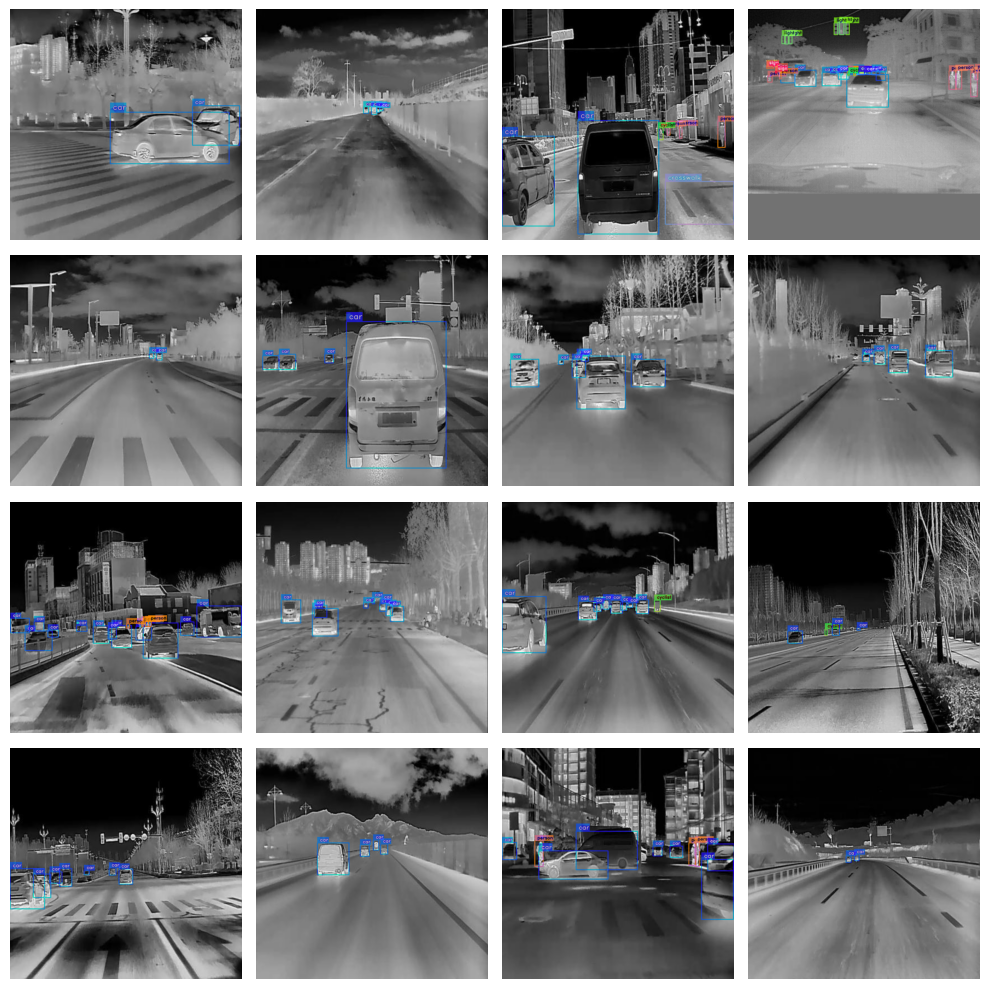

In [12]:

test_data.dataset.plot()

In [13]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import torch
import cv2
import numpy as np
from PIL import Image
import io

def load_model():
    try:
        model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
        model.eval()
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def process_image(image, model):
    try:
        # Convert to RGB if needed
        if isinstance(image, str):
            img = cv2.imread(image)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        elif isinstance(image, np.ndarray):
            if len(image.shape) == 2:  # Grayscale
                img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
            elif len(image.shape) == 3 and image.shape[2] == 3:
                img = image.copy()
            else:
                raise ValueError("Unsupported image format")
        else:
            raise ValueError("Unsupported image type")

        # Make prediction
        results = model(img)

        # Get detection results
        df = results.pandas().xyxy[0]

        # Draw results on image
        for _, row in df.iterrows():
            x1, y1, x2, y2 = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
            label = f"{row['name']}: {row['confidence']:.2f}"

            # Draw box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Draw label background
            (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
            cv2.rectangle(img, (x1, y1 - 20), (x1 + w, y1), (0, 255, 0), -1)

            # Draw text
            cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, (0, 0, 0), 1)

        # Prepare detection summary
        summary = "Detected Objects:\n"
        counts = df['name'].value_counts()
        for obj, count in counts.items():
            summary += f"{obj}: {count}\n"

        return img, summary

    except Exception as e:
        print(f"Error processing image: {e}")
        return None, f"Error processing image: {str(e)}"

def batch_process(files):
    try:
        # Load model
        model = load_model()
        if model is None:
            return None, "Failed to load model"

        processed_images = []
        all_summaries = []

        # Process each file
        for file in files:
            # Read image using PIL
            img = Image.open(file.name)
            # Convert to numpy array
            img_array = np.array(img)

            # Process image
            processed_img, summary = process_image(img_array, model)
            if processed_img is not None:
                processed_images.append(processed_img)
                all_summaries.append(f"\nResults for {file.name}:\n{summary}")

        # Combine all summaries
        final_summary = "\n".join(all_summaries)

        return processed_images, final_summary

    except Exception as e:
        return None, f"Error in batch processing: {str(e)}"

# Create Gradio interface
def create_interface():
    with gr.Blocks() as interface:
        gr.Markdown("# YOLOv5 Object Detection")

        with gr.Row():
            with gr.Column():
                # Fixed the File component configuration
                input_images = gr.File(
                    label="Upload Images",
                    file_count="multiple",
                    type="filepath"  # Changed from 'file' to 'filepath'
                )
                detect_btn = gr.Button("Detect Objects")

            with gr.Column():
                output_gallery = gr.Gallery(label="Detection Results")
                output_text = gr.Textbox(label="Detection Summary", lines=10)

        detect_btn.click(
            fn=batch_process,
            inputs=[input_images],
            outputs=[output_gallery, output_text]
        )

    return interface

# For Google Colab, use these lines:
if __name__ == "__main__":
    # Install required packages
    try:
        import google.colab
        !pip install -q ultralytics gradio
    except:
        pass

    # Create and launch the interface
    interface = create_interface()
    interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://094a55bf361487caa7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirement ['numpy>=1.23.5'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 293.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0

requirements: AutoUpdate success ✅ 5.4s, installed 1 package: ['numpy>=1.23.5']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-12-19 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 382MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_